# Crime Data from St. Louis Missouri (2008-2015)
## Loading and Cleaning the Data

In [1]:
import gmaps
import numpy as np
import pandas as pd
import requests
import time

In [2]:
# Prepare list of files to load.
load_urls = ['2008_data.csv', '2009.csv', '2010.csv', '2011.csv', '2012.csv', '2013.csv', '2014.csv', '2015.csv']

# Create list of columns we want to use in the final DF.
column_names = ['CADAddress', 'CADStreet', 'CodedMonth', 'Count', 'Crime', 'ShortCrimeCode', 'UCRType',\
                'UCRCrime', 'DateOccured', 'Description', 'District', 'FlagCrime', 'FlagUnfounded',\
                'ILEADSAddress','ILEADSStreet', 'LocationComment', 'LocationName', 'Neighborhood',\
                'NeighborhoodName', 'NeighborhoodPrimaryDistrict', 'NeighborhoodAddlDistrict', 'Latitude',\
                'Longitude', 'Year']

In [3]:
# Create empty DF for crime data
crime_df = pd.DataFrame(columns = column_names)

# Read single year crime files and store into final data frame
for file in load_urls:
    load_df = pd.read_csv(f'Data/{file}')
    
    # Select only the columns we want from the single year csv.
    load_df = load_df[column_names]
    
    # Append data from the single year csv into the final DF
    crime_df = crime_df.append(load_df,ignore_index=True)

In [4]:
# Preview data
crime_df.head()

,CADAddress,CADStreet,CodedMonth,Count,Crime,ShortCrimeCode,UCRType,UCRCrime,DateOccured,Description,...,ILEADSStreet,LocationComment,LocationName,Neighborhood,NeighborhoodName,NeighborhoodPrimaryDistrict,NeighborhoodAddlDistrict,Latitude,Longitude,Year
0,4900,MAPLE,2008-04,1,177000,17,2,Sex Offenses,1/1/2000,SEX OFFNS-INCEST,...,MAPLE AVE,NaN,NaN,53.0,Fountain Park,8.0,NaN,38.658845,-90.260116,2008.0
1,4357,CALIFORNIA,2008-04,1,67501,6,1,Larceny-theft,1/1/2003,LARCENY-FROM BUILDING OVER $25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4313,MARGARETTA,2008-04,1,115400,11,2,Fraud,1/1/2004,STLG BY DECEIT/IDENTITY THEFT REPORT,...,MARGARETTA AVE,NaN,NaN,68.0,O'Fallon,5.0,6.0,38.671754,-90.233544,2008.0
3,3939,OHIO,2008-04,1,115400,11,2,Fraud,1/1/2006,STLG BY DECEIT/IDENTITY THEFT REPORT,...,OHIO AVE,NaN,NaN,16.0,Dutchtown,1.0,NaN,38.583504,-90.230145,2008.0
4,2612,ANNIE MALONE DR,2008-04,1,91113,9,2,Other assaults,1/1/2007,SIMPLE ASSAULT-ADULT/NO INJURY,...,ANNIE MALONE DR,@ANNIE MALONE HOME,NaN,57.0,The Ville,8.0,NaN,38.659580,-90.236606,2008.0


In [5]:
# How many records do we have?
crime_df['CADAddress'].count()

449000

In [6]:
# Remove rows that do not have location information complete.
crime_df = crime_df.loc[(pd.isna(crime_df['Latitude'])==False) & (pd.isna(crime_df['Longitude'])==False) & (pd.isna(crime_df['NeighborhoodName'])==False)]

In [7]:
# How many records do we have after dropping nulls?
crime_df['CADAddress'].count()

435650

In [8]:
# I had issues with indexing into the list created by the split string funtion for reach row so I created a new column for the
## split string then did a for loop to assign the year from that column to the year column if the year column is null.

crime_df['Year_calc'] = crime_df['CodedMonth'].str.split('-')

for index in crime_df.index:
    if pd.isna(crime_df['Year'][index]) == True:
        crime_df['Year'][index] =  crime_df['Year_calc'][index][0]
crime_df.head()

,CADAddress,CADStreet,CodedMonth,Count,Crime,ShortCrimeCode,UCRType,UCRCrime,DateOccured,Description,...,LocationComment,LocationName,Neighborhood,NeighborhoodName,NeighborhoodPrimaryDistrict,NeighborhoodAddlDistrict,Latitude,Longitude,Year,Year_calc
0,4900,MAPLE,2008-04,1,177000,17,2,Sex Offenses,1/1/2000,SEX OFFNS-INCEST,...,NaN,NaN,53.0,Fountain Park,8.0,NaN,38.658845,-90.260116,2008.0,"[2008, 04]"
2,4313,MARGARETTA,2008-04,1,115400,11,2,Fraud,1/1/2004,STLG BY DECEIT/IDENTITY THEFT REPORT,...,NaN,NaN,68.0,O'Fallon,5.0,6.0,38.671754,-90.233544,2008.0,"[2008, 04]"
3,3939,OHIO,2008-04,1,115400,11,2,Fraud,1/1/2006,STLG BY DECEIT/IDENTITY THEFT REPORT,...,NaN,NaN,16.0,Dutchtown,1.0,NaN,38.583504,-90.230145,2008.0,"[2008, 04]"
4,2612,ANNIE MALONE DR,2008-04,1,91113,9,2,Other assaults,1/1/2007,SIMPLE ASSAULT-ADULT/NO INJURY,...,@ANNIE MALONE HOME,NaN,57.0,The Ville,8.0,NaN,38.659580,-90.236606,2008.0,"[2008, 04]"
5,5500,DELMAR,2008-04,1,21000,2,1,Forcible Rape,1/1/2008,RAPE -- FORCIBLE,...,NaN,NaN,49.0,Visitation Park,7.0,NaN,38.654057,-90.278155,2008.0,"[2008, 04]"


In [9]:
# Remove the no longer needed Year_calc column
crime_df.drop('Year_calc', inplace=True, axis=1)

In [10]:
# Change the data type of the year column to be an int to remove the decimal
crime_df['Year'] = crime_df['Year'].astype('int')

crime_df.head()

,CADAddress,CADStreet,CodedMonth,Count,Crime,ShortCrimeCode,UCRType,UCRCrime,DateOccured,Description,...,ILEADSStreet,LocationComment,LocationName,Neighborhood,NeighborhoodName,NeighborhoodPrimaryDistrict,NeighborhoodAddlDistrict,Latitude,Longitude,Year
0,4900,MAPLE,2008-04,1,177000,17,2,Sex Offenses,1/1/2000,SEX OFFNS-INCEST,...,MAPLE AVE,NaN,NaN,53.0,Fountain Park,8.0,NaN,38.658845,-90.260116,2008
2,4313,MARGARETTA,2008-04,1,115400,11,2,Fraud,1/1/2004,STLG BY DECEIT/IDENTITY THEFT REPORT,...,MARGARETTA AVE,NaN,NaN,68.0,O'Fallon,5.0,6.0,38.671754,-90.233544,2008
3,3939,OHIO,2008-04,1,115400,11,2,Fraud,1/1/2006,STLG BY DECEIT/IDENTITY THEFT REPORT,...,OHIO AVE,NaN,NaN,16.0,Dutchtown,1.0,NaN,38.583504,-90.230145,2008
4,2612,ANNIE MALONE DR,2008-04,1,91113,9,2,Other assaults,1/1/2007,SIMPLE ASSAULT-ADULT/NO INJURY,...,ANNIE MALONE DR,@ANNIE MALONE HOME,NaN,57.0,The Ville,8.0,NaN,38.659580,-90.236606,2008
5,5500,DELMAR,2008-04,1,21000,2,1,Forcible Rape,1/1/2008,RAPE -- FORCIBLE,...,DELMAR BLVD,NaN,NaN,49.0,Visitation Park,7.0,NaN,38.654057,-90.278155,2008


In [11]:
# Remove row where CADStreet is unknown
crime_df = crime_df.loc[crime_df['CADStreet'] != 'unknown 0000']

In [12]:
# Check if we can map the Nieghborhood column to a value from another column from the same street, if null.

neighborhoods = crime_df.groupby(['CADStreet','NeighborhoodName']).count()
neighborhoods

## Looks like CADStreet and Neighboborhood do not have a 1-1 relationship, as suspected. So we should not try to map this.
### When we do analysis on Neighborhoods we will just need to keep that in mind. 

CADAddress  CodedMonth  Count  \
CADStreet NeighborhoodName                                                  
          Academy                                  867         867    867   
          Baden                                   1249        1249   1249   
          Benton Park                              607         607    607   
          Benton Park West                         723         723    723   
          Bevo Mill                               1160        1160   1160   
          Botanical Garden                          20          20     20   
          Boulevard Heights                        492         492    492   
          Calvary-Bellefontaine Cemetaries         130         130    130   
          Cardonlet                               1446        1446   1446   
          Carondelet Park                          163         163    163   
          Carr Square                              527         527    527   
          Central West End                        3271        3271   3271   
          Cheltenham                               288         288    288   
          Clayton-Tamm                             343         343    343   
          Clifton Heights                          209         209    209   
          College Hill                             622         622    622   
          Columbus Square                          614         614    614   
          Compton Heights                          145         145    145   
          Covenant Blu - Grand Center             1104        1104   1104   
          DeBaliviere Place                        340         340    340   
          Downtown                                7155        7155   7155   
          Downtown West                           5368        5368   5368   
          Dutchtown                               2608        2608   2608   
          Ellendale                                210         210    210   
          Fairground Neighborhood                  865         865    865   
          Fairgrounds Park                         151         151    151   
          Forest Park                              874         874    874   
          Forest Park SE                          1135        1135   1135   
          Fountain Park                            582         582    582   
          Fox Park                                 391         391    391   
...                                                ...         ...    ...   
WYOMING   Lindenwood Park                           16          16     16   
          Marine Villa                               1           1      1   
          Near N. Riverfront                         2           2      2   
          North Hampton                              7           7      7   
          Shaw                                       1           1      1   
          Soulard                                    2           2      2   
          Southwest Garden                           1           1      1   
          The Gate District                          1           1      1   
          Tiffany                                    2           2      2   
          Tower Grove East                         249         249    249   
          Tower Grove South                        563         563    563   
          Unknown                                    2           2      2   
          Vandeventer                                1           1      1   
          Walnut Park West                           1           1      1   
YALE      Patch                                      1           1      1   
YARD      Boulevard Heights                          2           2      2   
YATES     Boulevard Heights                         36          36     36   
          Cardonlet                                  2           2      2   
YORK      Central West End                           1           1      1   
          Kingsway East                 

In [13]:
crime_df

,CADAddress,CADStreet,CodedMonth,Count,Crime,ShortCrimeCode,UCRType,UCRCrime,DateOccured,Description,...,ILEADSStreet,LocationComment,LocationName,Neighborhood,NeighborhoodName,NeighborhoodPrimaryDistrict,NeighborhoodAddlDistrict,Latitude,Longitude,Year
0,4900,MAPLE,2008-04,1,177000,17,2,Sex Offenses,1/1/2000,SEX OFFNS-INCEST,...,MAPLE AVE,NaN,NaN,53.0,Fountain Park,8.0,NaN,38.658845,-90.260116,2008
2,4313,MARGARETTA,2008-04,1,115400,11,2,Fraud,1/1/2004,STLG BY DECEIT/IDENTITY THEFT REPORT,...,MARGARETTA AVE,NaN,NaN,68.0,O'Fallon,5.0,6.0,38.671754,-90.233544,2008
3,3939,OHIO,2008-04,1,115400,11,2,Fraud,1/1/2006,STLG BY DECEIT/IDENTITY THEFT REPORT,...,OHIO AVE,NaN,NaN,16.0,Dutchtown,1.0,NaN,38.583504,-90.230145,2008
4,2612,ANNIE MALONE DR,2008-04,1,91113,9,2,Other assaults,1/1/2007,SIMPLE ASSAULT-ADULT/NO INJURY,...,ANNIE MALONE DR,@ANNIE MALONE HOME,NaN,57.0,The Ville,8.0,NaN,38.659580,-90.236606,2008
5,5500,DELMAR,2008-04,1,21000,2,1,Forcible Rape,1/1/2008,RAPE -- FORCIBLE,...,DELMAR BLVD,NaN,NaN,49.0,Visitation Park,7.0,NaN,38.654057,-90.278155,2008
7,3628,MORGANFORD,2008-04,1,44026,4,1,Aggravated Assault,1/1/2008,ASLT-AGGRV-HND/FST/FT-3RD-CHILD-DOMESTIC,...,MORGANFORD RD,NaN,NaN,15.0,Tower Grove South,3.0,NaN,38.591980,-90.262733,2008
8,1034,S KINGSHIGHWAY,2008-04,1,264100,26,2,Other,1/3/2008,HEALTH-SANITATION VIOL,...,S. KINGSHIGHWAY,NaN,NaN,0.0,Unknown,NaN,NaN,35.801506,-93.265663,2008
9,1115,HAMPTON,2008-04,1,117000,11,2,Fraud,1/5/2008,FAILURE TO RETURN BORROWED/RENTED VEHICL,...,HAMPTON AVE,NaN,NaN,42.0,Clayton-Tamm,2.0,NaN,38.629210,-90.287514,2008
10,1402,S GRAND,2008-04,-1,71013,7,1,Motor vehicle theft,1/8/2008,AUTO THEFT-PERM RETNT/UNRECOV OVER 48HR,...,S GRAND BLVD,NaN,NaN,31.0,The Gate District,9.0,NaN,38.622133,-90.237425,2008
11,4200,SHAW,2008-04,1,177000,17,2,Sex Offenses,1/10/2008,SEX OFFNS-INCEST,...,SHAW AVE,2 FAMILY FLAT DWELLING,NaN,27.0,Shaw,3.0,NaN,38.616239,-90.254611,2008


## Trends Per Year

In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
minicrime = crime_df[["Count", "Year"]]
overall_crime = minicrime.groupby(['Year']).sum()


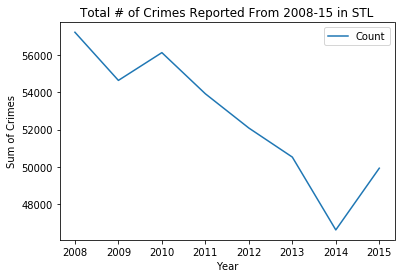

In [25]:
tot_crime = overall_crime.plot(kind="line", title="Total # of Crimes Reported From 2008-15 in STL")
tot_crime.set_xlabel("Year")
tot_crime.set_ylabel("Sum of Crimes")

plt.show()

In [17]:
years = crime_df[["Count", "Year", 'UCRType']]

lev_two = years.loc[years["UCRType"] >= 2]
lev_two = lev_two.drop(columns=['UCRType'])
lev_two_group = lev_two.groupby(['Year']).sum()

lev_one = years.loc[years["UCRType"] <= 1]
lev_one = lev_one.drop(columns=['UCRType'])
lev_one_group = lev_one.groupby(['Year']).sum()

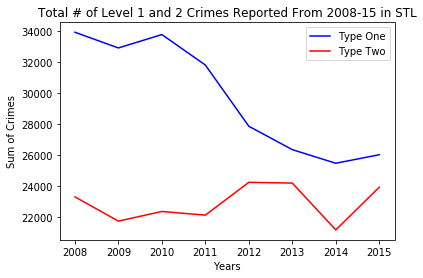

In [24]:
# Plot the Level One Crimes as a line chart
level_one_crimes = plt.plot(lev_one_group, color="blue", label='Type One')

# Plot the Level Two Crimes as a line chart
level_two_crimes = plt.plot(lev_two_group, color="red", label='Type Two')

# Create a legend for our chart along with labels
plt.legend()
plt.title("Total # of Level 1 and 2 Crimes Reported From 2008-15 in STL")
plt.xlabel("Years")
plt.ylabel("Sum of Crimes")
plt.show()

## Offenses Per Neighborhood

## Heat Maps

Figure(layout=FigureLayout(height='420px'))